In [ ]:
import datetime as dt
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import math
import seaborn as sns

In [ ]:
import matplotlib.pyplot as plt
from matplotlib import pyplot

from datetime import datetime, timedelta

import os
import gc
import glob
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
from datetime import datetime
import datetime
from tqdm import tqdm
from matplotlib.patches import Rectangle
import warnings

import seaborn as sns

from sklearn import svm
from sklearn.datasets import  make_blobs
from sklearn.covariance import EllipticEnvelope
from sklearn.ensemble import IsolationForest
from sklearn.neighbors import LocalOutlierFactor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_samples

from scipy import stats
import plotly.express as px
import plotly.graph_objects as go
from sklearn.model_selection import GridSearchCV

warnings.filterwarnings("ignore")

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
all_files_cpu = glob.glob(os.path.join("/content/drive/MyDrive/Colab Notebooks/k8s/cpu/*.csv"))
all_files_cpu.sort()

li = []

for filename in all_files_cpu:
    print(filename)
    df = pd.read_csv(filename, skiprows=[0], parse_dates=['Time'])
    li.append(df)


cpu = pd.concat(li, axis=0, ignore_index=True)

fields_nodes_all = ['real: cl1i6ek5us1gmcv87dql-oqaz |  ', 'real: cl1i6ek5us1gmcv87dql-ulyg |  ', 'real: cl1i6ek5us1gmcv87dql-utuc |  ']
fields_nodes_first = ['Time', 'real: cl1i6ek5us1gmcv87dql-oqaz |  ']

cpu.columns = ['Time', 'node1', 'node2', 'node3']
cpu['nodes_all'] = cpu['node1'] + cpu['node2'] + cpu['node3']


/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-15__10-20.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-21__10-24.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-25__10-27.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU10-27__11-03.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-03__11-08.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-08__11-11.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-12__11-14.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-14__11-18.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU11-19__11-22.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-11-22__2023-11-26.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-11-27__2023-12-02.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-02__2023-12-09.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-10__2023-12-16.csv
/content/drive/MyDrive/Colab Notebooks/k8s/cpu/CPU2023-12-17-2023-12-22.csv
/content/driv

In [ ]:
cpu

,Time,node1,node2,node3,nodes_all
0,2023-10-15 19:10:00,0.7230,0.174,0.490,1.3870
1,2023-10-15 19:15:00,1.6500,0.953,0.492,3.0950
2,2023-10-15 19:20:00,1.3900,0.824,0.378,2.5920
3,2023-10-15 19:25:00,1.4000,0.734,0.473,2.6070
4,2023-10-15 19:30:00,1.4900,0.879,0.528,2.8970
...,...,...,...,...,...
31031,2024-02-04 23:35:00,0.0799,0.218,0.186,0.4839
31032,2024-02-04 23:40:00,0.0799,0.218,0.188,0.4859
31033,2024-02-04 23:45:00,0.0801,0.215,0.188,0.4831
31034,2024-02-04 23:50:00,0.0805,0.217,0.187,0.4845


In [ ]:
df_cpu = cpu[['Time', 'node1']]
df_cpu.columns = ['time', 'cpu_usage']
df_cpu.set_index('time', inplace=True)

#df_cpu = df_cpu.resample('1H', base=0.5).last()


print(df_cpu.isnull().any())
print(df_cpu.isna().any())
df_cpu['cpu_usage'].fillna(df_cpu['cpu_usage'].mean(), inplace=True)
print(df_cpu.isnull().any())
print(df_cpu.isna().any())

cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool
cpu_usage    False
dtype: bool


In [ ]:
df_cpu

,cpu_usage
time,
2023-10-15 19:10:00,0.7230
2023-10-15 19:15:00,1.6500
2023-10-15 19:20:00,1.3900
2023-10-15 19:25:00,1.4000
2023-10-15 19:30:00,1.4900
...,...
2024-02-04 23:35:00,0.0799
2024-02-04 23:40:00,0.0799
2024-02-04 23:45:00,0.0801


In [ ]:
all_files_ram = glob.glob(os.path.join("/content/drive/MyDrive/Colab Notebooks/k8s/ram/*.csv"))
all_files_ram.sort()

li = []

for filename in all_files_ram:
    df = pd.read_csv(filename, skiprows=[0], parse_dates=['Time'])
    li.append(df)


ram = pd.concat(li, axis=0, ignore_index=True)

fields_nodes_all = ['real: cl1i6ek5us1gmcv87dql-oqaz |  ', 'real: cl1i6ek5us1gmcv87dql-ulyg |  ', 'real: cl1i6ek5us1gmcv87dql-utuc |  ']
fields_nodes_first = ['Time', 'real: cl1i6ek5us1gmcv87dql-oqaz |  ']

ram.columns = ['Time', 'node1', 'node2', 'node3']
ram['nodes_all'] = ram['node1'] + ram['node2'] + ram['node3']

In [ ]:
ram

,Time,node1,node2,node3,nodes_all
0,2023-10-15 19:10:00,37038891008,36398960640,38560374784,111998226432
1,2023-10-15 19:15:00,37153251328,36420562944,39022686208,112596500480
2,2023-10-15 19:20:00,37240102912,36420161536,39149137920,112809402368
3,2023-10-15 19:25:00,37333958656,36423467008,39163170816,112920596480
4,2023-10-15 19:30:00,37343805440,36425986048,40512155648,114281947136
...,...,...,...,...,...
31031,2024-02-04 23:35:00,59966435328,50358718464,52388679680,162713833472
31032,2024-02-04 23:40:00,60111867904,50365763584,52309880832,162787512320
31033,2024-02-04 23:45:00,60007501824,50336706560,52273143808,162617352192
31034,2024-02-04 23:50:00,59999752192,50343628800,52292202496,162635583488


In [ ]:
df_ram = ram[['Time', 'node1']]
df_ram.columns = ['time', 'ram_usage']
df_ram.set_index('time', inplace=True)

#df_ram = df_ram.resample('1H', base=0.5).last()


print(df_ram.isnull().any())
print(df_ram.isna().any())
df_ram['ram_usage'].fillna(df_ram['ram_usage'].mean(), inplace=True)
print(df_ram.isnull().any())
print(df_ram.isna().any())

ram_usage    False
dtype: bool
ram_usage    False
dtype: bool
ram_usage    False
dtype: bool
ram_usage    False
dtype: bool


In [ ]:
df_ram

,ram_usage
time,
2023-10-15 19:10:00,37038891008
2023-10-15 19:15:00,37153251328
2023-10-15 19:20:00,37240102912
2023-10-15 19:25:00,37333958656
2023-10-15 19:30:00,37343805440
...,...
2024-02-04 23:35:00,59966435328
2024-02-04 23:40:00,60111867904
2024-02-04 23:45:00,60007501824


In [ ]:
df_cpu['ram_usage'] = df_ram['ram_usage']
df = df_cpu
df

,cpu_usage,ram_usage
time,,
2023-10-15 19:10:00,0.7230,37038891008
2023-10-15 19:15:00,1.6500,37153251328
2023-10-15 19:20:00,1.3900,37240102912
2023-10-15 19:25:00,1.4000,37333958656
2023-10-15 19:30:00,1.4900,37343805440
...,...,...
2024-02-04 23:35:00,0.0799,59966435328
2024-02-04 23:40:00,0.0799,60111867904
2024-02-04 23:45:00,0.0801,60007501824


In [ ]:
for column in df.columns:
    fig = px.line(df, x=df.index, y=[column], title='AWS ' + column, template = 'plotly_dark')
    fig.show()

# Local Outlier Factor PyOD

In [ ]:
dataframe = df.copy()
dataframe.head()

,cpu_usage,ram_usage
time,,
2023-10-15 19:10:00,0.723,37038891008
2023-10-15 19:15:00,1.650,37153251328
2023-10-15 19:20:00,1.390,37240102912
2023-10-15 19:25:00,1.400,37333958656
2023-10-15 19:30:00,1.490,37343805440


In [ ]:
!pip install pyod

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyod: filename=pyod-1.1.3-py3-none-any.whl size=190251 sha256=50ba2d5e3240d385914f83d042909bf11eb26da52af81a9b2506cd4099f94465
  Stored in directory: /root/.cache/pip/wheels/05/f8/db/124d43bec122d6ec0ab3713fadfe25ebed8af52ec561682b4e
Successfully built pyod


In [ ]:
from pyod.models.lof import LOF

random_state = np.random.RandomState(15)     # A fixed values is assigned, then no matter how many time you execute your code,values generated would be the same
#Does this mean that later on the code the outliers 5% higher than maximum value of dataset?
classifiers = {
        'Local Outlier Factor':LOF(n_neighbors=40, contamination=0.05)
}

In [ ]:
column_usage = 'cpu_usage'
X = dataframe[[column_usage]].values.reshape(-1,1)

In [ ]:
X

array([[0.723 ],
       [1.65  ],
       [1.39  ],
       ...,
       [0.0801],
       [0.0805],
       [0.0808]])

In [ ]:
from scipy import stats
for i, (clf_name, clf) in enumerate(classifiers.items()):
    clf.fit(X)


    y_pred = clf.predict(X)
    n_inliers = len(y_pred) - np.count_nonzero(y_pred)
    n_outliers = np.count_nonzero(y_pred == 1)

    # copy of dataframe
    dfx = dataframe[[column_usage]]
    dfx['outlier'] = y_pred.tolist()

    print('OUTLIERS : ',n_outliers,'INLIERS : ',n_inliers, clf_name)

y = dfx['outlier'].values.reshape(-1,1)

OUTLIERS :  1313 INLIERS :  29723 Local Outlier Factor


In [ ]:
dfx

,cpu_usage,outlier
time,,
2023-10-15 19:10:00,0.7230,0
2023-10-15 19:15:00,1.6500,0
2023-10-15 19:20:00,1.3900,1
2023-10-15 19:25:00,1.4000,1
2023-10-15 19:30:00,1.4900,0
...,...,...
2024-02-04 23:35:00,0.0799,0
2024-02-04 23:40:00,0.0799,0
2024-02-04 23:45:00,0.0801,0


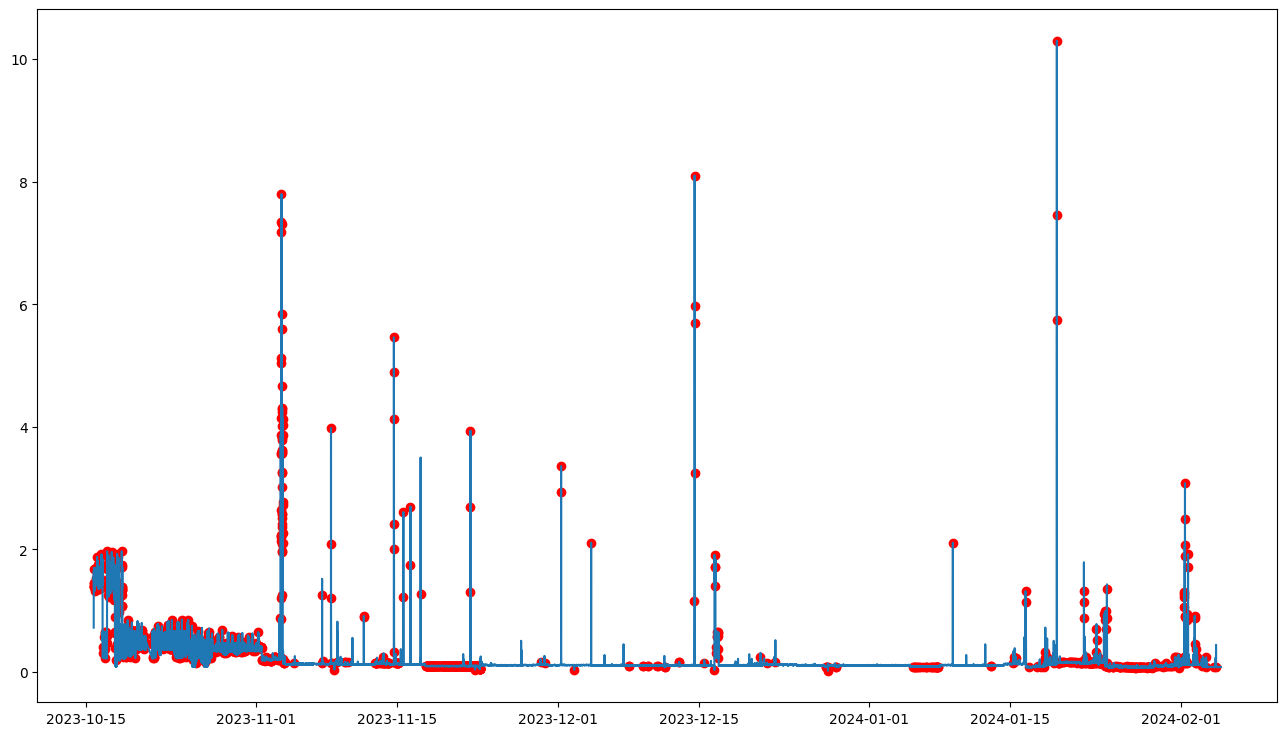

In [ ]:
fig, ax = plt.subplots(figsize=(16, 9))
a = dfx.loc[dfx.outlier == 1, [column_usage]]

ax.plot(dfx.index, dfx[column_usage])
ax.scatter(a.index, a[column_usage], color='red')
plt.show()

In [ ]:
# Define colors for anomalies and non-anomalies
colors = ['green' if a == 0 else 'red' for a in y_pred]

# Create a scatter plot of the data with anomalies highlighted in red
fig = go.Figure(data=go.Scatter(x=dfx.index, y=dfx[column_usage],
                                 mode='markers', marker=dict(color=colors, size=3)))

# Set the title and axis labels for the plot
fig.update_layout(title=dict(text='LOF Anomaly prediction', x=0.5),
                  yaxis_title='Value',
                  xaxis_title='Timestamp')

# Show the plot
fig.show()

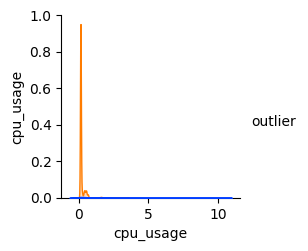

In [ ]:
sns.pairplot(data=dfx, vars = df[[column_usage]],
             hue='outlier', hue_order=[1, 0],
             markers=['*', 'o'],  palette='bright');

# Metrics


In [ ]:
y_pred = y_pred == 0
dfx['name'] = y_pred
y_pred

array([ True,  True, False, ...,  True,  True,  True])

In [ ]:
p_values = {}
p_stats_ = {}
percent = {}
silhoutte = {}
calinski_harabasz = {}
davies_bouldin = {}

# scaler = MinMaxScaler()
# X = scaler.fit_transform(X)

cols_in = [column_usage]

In [ ]:
dfx['name'].value_counts()

True     29723
False     1313
Name: name, dtype: int64

In [ ]:
#percent anomaly
dist = dfx['name'].value_counts(normalize=True)
print(dist)
percent['name'] = dist.loc[True]

True     0.957694
False    0.042306
Name: name, dtype: float64


In [ ]:
#silhouette conficient samples non-anomaly
labels = [1 if i == True else 2 for i in dfx['name']]
dfx['silhouette_zcore_'] = silhouette_samples(df[[column_usage]], labels)
silhoutte['name'] = dfx[dfx['name']]['silhouette_zcore_'].mean()

In [ ]:
#ks coeficient
normal = dfx.loc[dfx['name'] == False, [column_usage]]
anomaly = dfx.loc[dfx['name'] == True, [column_usage]]
for col_in in tqdm(cols_in):
  if len(normal)>0 and len(anomaly)>0:
    stats_, pvalue = stats.kstest(normal[col_in], anomaly[col_in])
    p_values[col_in+'_'] = pvalue
    p_stats_[col_in+'_'] = stats_

100%|██████████| 1/1 [00:00<00:00, 69.96it/s]


In [ ]:
from sklearn.metrics import calinski_harabasz_score

ch_index = calinski_harabasz_score(df[[column_usage]], labels)
calinski_harabasz['name'] = round(ch_index, 3)
print("Calinski-Harabasz Index:", round(ch_index, 3))

Calinski-Harabasz Index: 2824.397


In [ ]:
from sklearn.metrics import davies_bouldin_score

dbi = davies_bouldin_score(df[[column_usage]], labels)
davies_bouldin['name'] = round(dbi, 3)
print("Davies-Bouldin Index:", round(dbi, 3))

Davies-Bouldin Index: 1.596


pvalue
  svm_algorithm         pvalue
0    cpu_usage_  4.070308e-311
{'cpu_usage_': 4.0703084959847e-311}


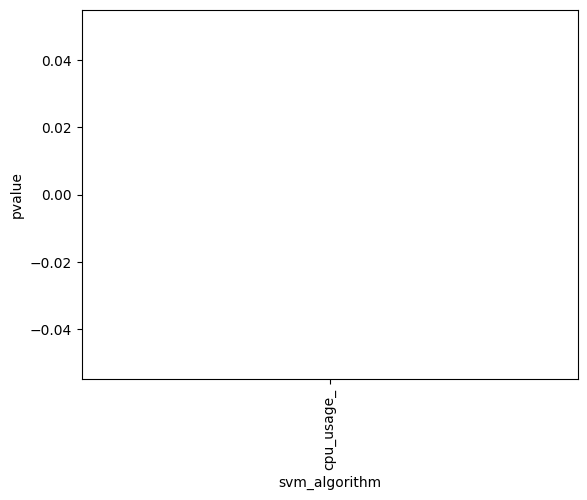

statistics
  svm_algorithm  statistics
0    cpu_usage_    0.515739
{'cpu_usage_': 0.5157390148627723}


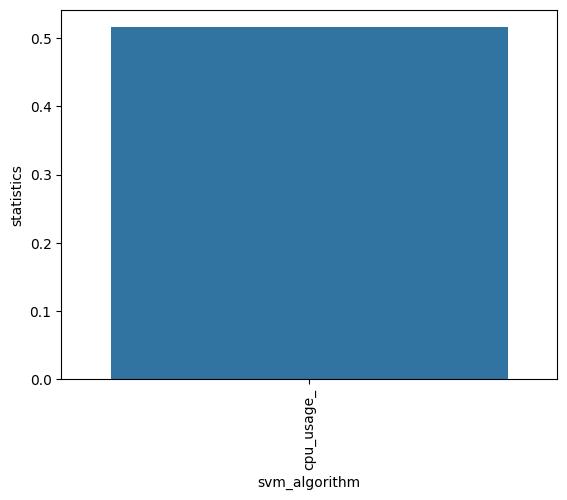

percent
  svm_algorithm   percent
0          name  0.957694
{'name': 0.9576942905013532}


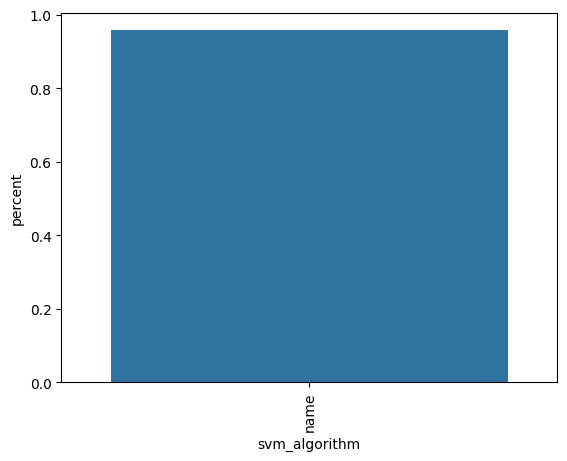

silhoutte
  svm_algorithm  silhoutte
0          name   0.762457
{'name': 0.7624568941121288}


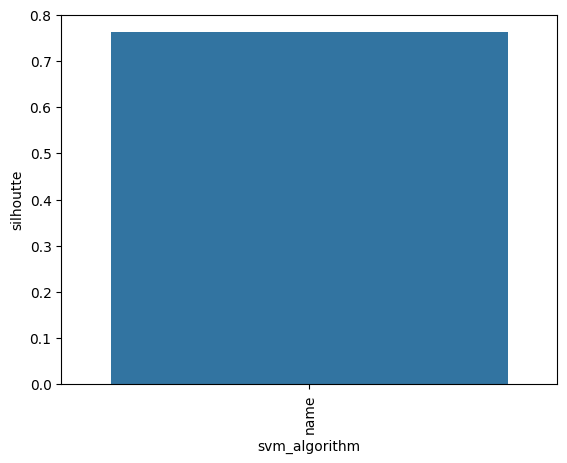

calinski_harabasz
  svm_algorithm  calinski_harabasz
0          name           2824.397
{'name': 2824.397}


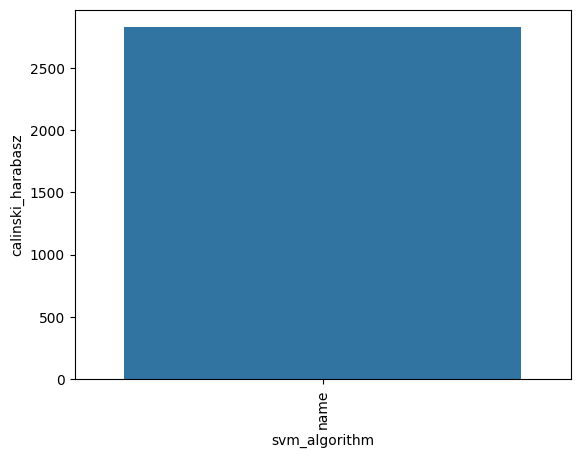

davies_bouldin
  svm_algorithm  davies_bouldin
0          name           1.596
{'name': 1.596}


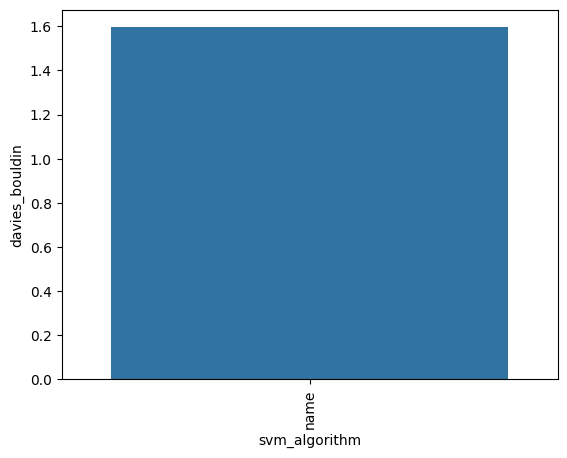

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name)
    df_values =  pd.DataFrame([dictionary])
    df_values = df_values.T
    df_values.reset_index(inplace=True)
    df_values.columns = ['svm_algorithm', name]
    print(df_values)
    print(dictionary)

    sns.barplot(data=df_values, x='svm_algorithm', y=name)
    plt.xticks(df_values.index, df_values['svm_algorithm'].values, rotation=90)
    plt.show()

In [ ]:
for name, dictionary in {'pvalue': p_values, 'statistics': p_stats_, 'percent': percent, 'silhoutte':silhoutte, 'calinski_harabasz': calinski_harabasz, 'davies_bouldin': davies_bouldin}.items():
    print(name + ': ' + str(np.array(list(dictionary.values())).mean()))

pvalue: 4.0703084959847e-311
statistics: 0.5157390148627723
percent: 0.9576942905013532
silhoutte: 0.7624568941121288
calinski_harabasz: 2824.397
davies_bouldin: 1.596
